In [36]:
import soundfile as sf
import sounddevice as sd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import echocomp

In [4]:
data = np.load('echocomp.npz')
s = data['s'] #signal from the far speaker
fs=8000
g1 = data['g1']
g2 = data['g2']
g3 = data['g3']

In [5]:
sd.play(s,fs)
#we lost the golden chain, those boxes were not

## 4.1

In [11]:
#parameters
#alpha = 0.1
#var = 0.16
#x = np.random.normal(scale=np.sqrt(var), size=16000)
#noise = np.zeros(16000)
#lh = 5 #arbitrary filter length
#nlms4echokomp(x,g1,noise,alpha,lh)

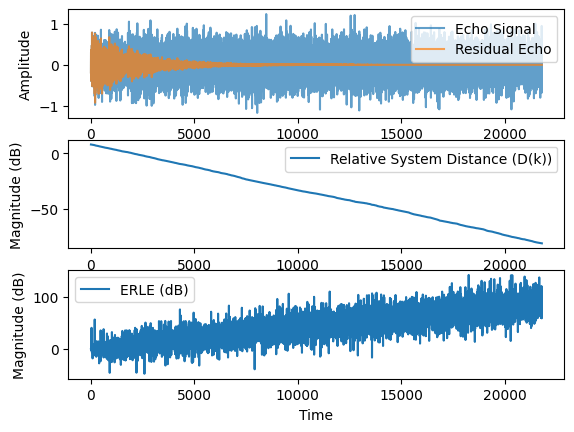

In [7]:
%run echocomp.py 1

## 4.2

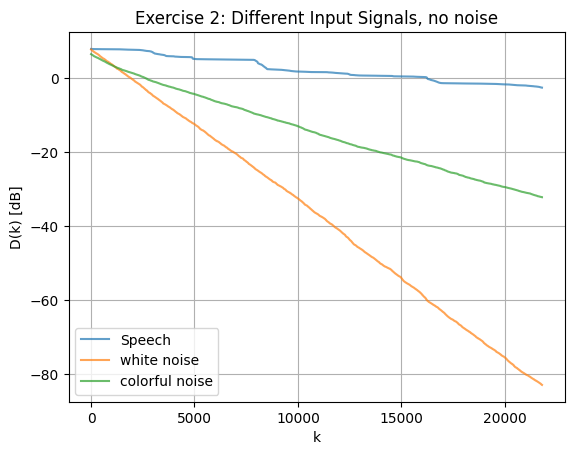

In [4]:
%run echocomp.py 2
# Higher input signal uniformity causes good convergence behaviour
# White noise is very uniform compared to speech -> faster convergence

## 4.3

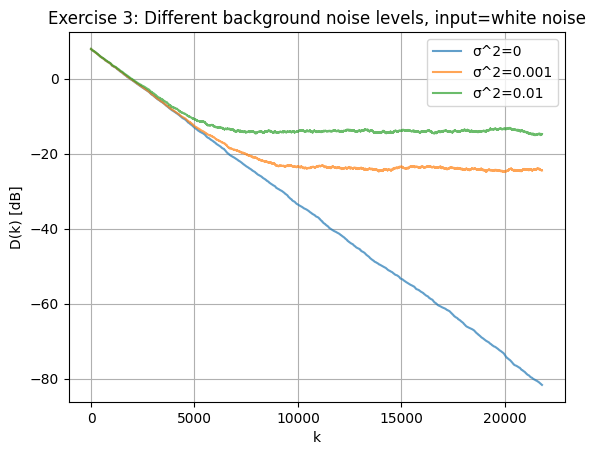

In [5]:
%run echocomp.py 3
# White noise as input signal
# With higher background noise levels
# The relative system distance converges quicker to a worse value
# relative to the amount of noise

## 4.4

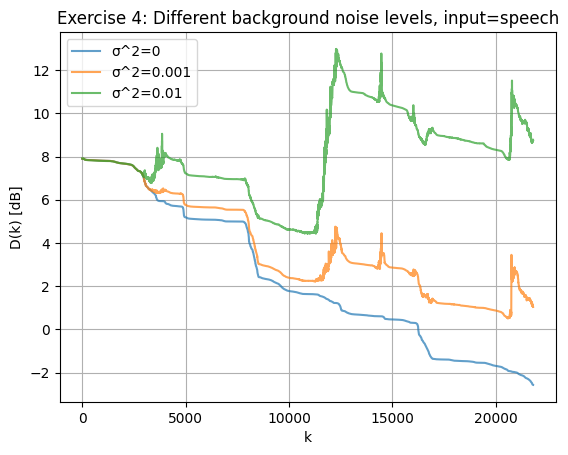

In [6]:
%run echocomp.py 4
# With higher noise variances and speech as input signal
# The relative system distance converges more slowly
# and diverges when the input speech changes

## 4.5

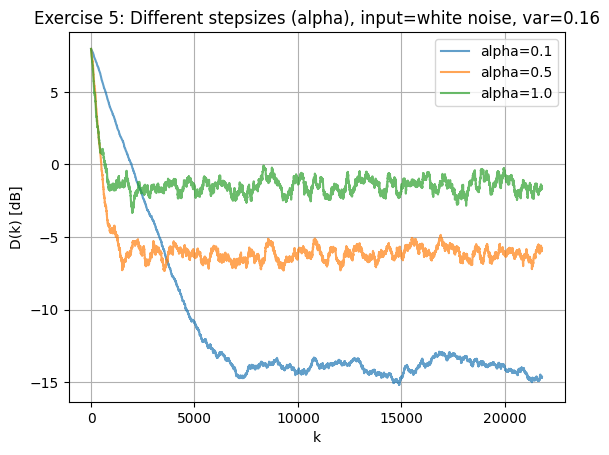

In [16]:
%run echocomp.py 5
# Larger alpha values cause faster convergence, but much worse
# final system distance values
# Large alpha values cause faster change in the beginning, but after a certain point can't keep up with the changing noise

## 4.6

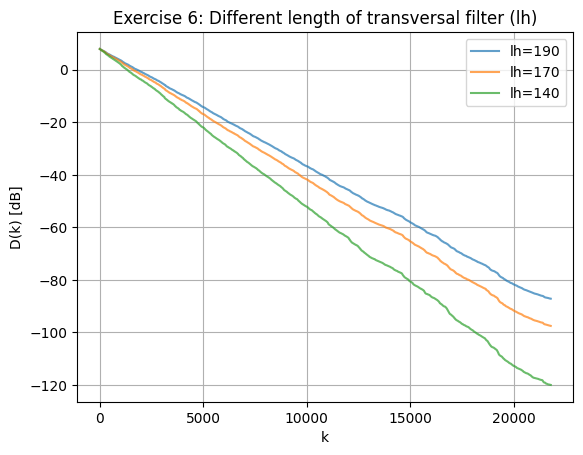

In [14]:
%run echocomp.py 6
# Shorter transversal filter seems to cause faster convergence of the relative system distance

## 4.7

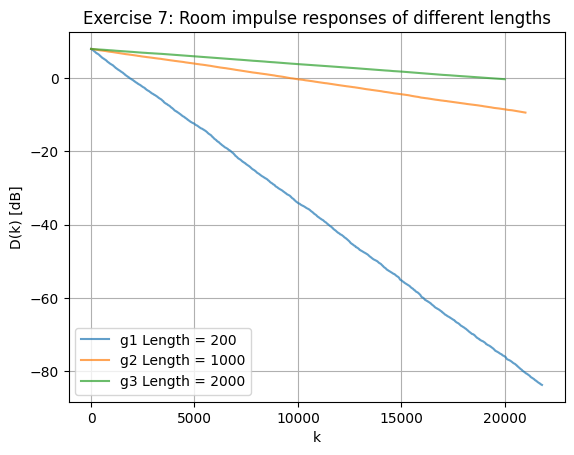

In [15]:
%run echocomp.py 7
# Shorter room impulse responses cause faster relative system distance convergence. 